In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

In [3]:
crabdata = pd.read_csv("C:/Users/User/Documents/UNI/3rd year/semester 2/ML/Project 1/CrabAgePrediction.csv")

In [4]:
crabdata.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [5]:
crabdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [6]:
#remove height=0
crabdata = crabdata[crabdata['Height'] > 0]

In [7]:
crabdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3891 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3891 non-null   object 
 1   Length          3891 non-null   float64
 2   Diameter        3891 non-null   float64
 3   Height          3891 non-null   float64
 4   Weight          3891 non-null   float64
 5   Shucked Weight  3891 non-null   float64
 6   Viscera Weight  3891 non-null   float64
 7   Shell Weight    3891 non-null   float64
 8   Age             3891 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 304.0+ KB


In [8]:
# Factorize the 'Sex' column
crabdata['Sex'] = pd.factorize(crabdata['Sex'])[0]

# If you want to change the numerical encoding to specific labels:
sex_labels = {0: 'Female', 1: 'Male', 2: 'Indeterminate'}  # Define the labels
crabdata['Sex'] = crabdata['Sex'].map(sex_labels)

# Show the first few rows of the DataFrame to verify the changes
print(crabdata.head())
crabdata.info()

             Sex  Length  Diameter  Height     Weight  Shucked Weight  \
0         Female  1.4375    1.1750  0.4125  24.635715       12.332033   
1           Male  0.8875    0.6500  0.2125   5.400580        2.296310   
2  Indeterminate  1.0375    0.7750  0.2500   7.952035        3.231843   
3         Female  1.1750    0.8875  0.2500  13.480187        4.748541   
4  Indeterminate  0.8875    0.6625  0.2125   6.903103        3.458639   

   Viscera Weight  Shell Weight  Age  
0        5.584852      6.747181    9  
1        1.374951      1.559222    6  
2        1.601747      2.764076    6  
3        2.282135      5.244657   10  
4        1.488349      1.700970    6  
<class 'pandas.core.frame.DataFrame'>
Index: 3891 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3891 non-null   object 
 1   Length          3891 non-null   float64
 2   Diameter        3891 non-null   float64
 

In [9]:
#data on different scales. so we standardize
from sklearn.preprocessing import StandardScaler
#split data to features and label by making a copy of each
X=crabdata[["Sex","Length","Diameter","Height","Weight","Shucked Weight", "Viscera Weight","Shell Weight"]].copy()
Y=crabdata["Age"].copy()

In [10]:
X.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,Female,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181
1,Male,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222
2,Indeterminate,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076
3,Female,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657
4,Indeterminate,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970


In [11]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_cols = ["Sex"]
numerical_cols = ["Length", "Diameter", "Height", "Weight", "Shucked Weight", "Viscera Weight", "Shell Weight"]

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Define the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
X_processed = pipeline.fit_transform(X)
print(X_processed)

[[ 0.41953843  0.62039253  0.60126404 ...  1.          0.
   0.        ]
 [-1.41179319 -1.49529346 -1.3091317  ...  0.          0.
   1.        ]
 [-0.91233911 -0.9915587  -0.9509325  ...  0.          1.
   0.        ]
 ...
 [-2.28583783 -2.25089561 -1.78673064 ...  0.          1.
   0.        ]
 [-0.82909676 -0.9915587  -0.83153277 ...  0.          1.
   0.        ]
 [-1.74476257 -1.64641389 -1.3091317  ...  0.          1.
   0.        ]]


In [12]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets 
X_train_scaled, X_test_scaled, Y_train, Y_test = train_test_split(X_processed, Y, 
                                                    train_size=0.8, 
                                                    random_state=123)

In [13]:
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Instantiate SVR
svr_model = SVR()

# Fit SVR to the cleaned training data
svr_model.fit(X_train_scaled, Y_train)

# Instantiate Ridge Regression
ridge_model = Ridge()

# Fit Ridge Regression to the cleaned training data
ridge_model.fit(X_train_scaled, Y_train)

# Instantiate Lasso Regression
lasso_model = Lasso()

# Fit Lasso Regression to the cleaned training data
lasso_model.fit(X_train_scaled, Y_train)

# Instantiate XGBoost
xgb_model = XGBRegressor()

# Fit XGBoost to the cleaned training data
xgb_model.fit(X_train_scaled, Y_train)

# Instantiate Random Forest
rf_model = RandomForestRegressor()

# Fit Random Forest to the cleaned training data
rf_model.fit(X_train_scaled, Y_train)

# Evaluate the models
svr_predictions_test = svr_model.predict(X_test_scaled)
svr_mse_test = mean_squared_error(Y_test, svr_predictions_test)

ridge_predictions_test = ridge_model.predict(X_test_scaled)
ridge_mse_test = mean_squared_error(Y_test, ridge_predictions_test)

lasso_predictions_test = lasso_model.predict(X_test_scaled)
lasso_mse_test = mean_squared_error(Y_test, lasso_predictions_test)

xgb_predictions_test = xgb_model.predict(X_test_scaled)
xgb_mse_test = mean_squared_error(Y_test, xgb_predictions_test)


rf_predictions_test = rf_model.predict(X_test_scaled)
rf_mse_test = mean_squared_error(Y_test, rf_predictions_test)


print("SVR Test MSE:", svr_mse_test)
print("Ridge Test MSE:", ridge_mse_test)
print("Lasso Test MSE:", lasso_mse_test)
print("XGBoost Test MSE:", xgb_mse_test)
print("Random Forest Test MSE:", rf_mse_test)

SVR Test MSE: 4.516438490689877
Ridge Test MSE: 4.877550100761471
Lasso Test MSE: 7.007889071249995
XGBoost Test MSE: 5.387027865286323
Random Forest Test MSE: 4.682359691912709


In [16]:
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Instantiate SVR
svr_model = SVR()

# Fit SVR to the cleaned training data
svr_model.fit(X_train_scaled, Y_train)

# Instantiate Ridge Regression
ridge_model = Ridge()

# Fit Ridge Regression to the cleaned training data
ridge_model.fit(X_train_scaled, Y_train)

# Instantiate Lasso Regression
lasso_model = Lasso()

# Fit Lasso Regression to the cleaned training data
lasso_model.fit(X_train_scaled, Y_train)

# Instantiate XGBoost
xgb_model = XGBRegressor()

# Fit XGBoost to the cleaned training data
xgb_model.fit(X_train_scaled, Y_train)

# Instantiate Random Forest
rf_model = RandomForestRegressor()

# Fit Random Forest to the cleaned training data
rf_model.fit(X_train_scaled, Y_train)

# Define function to calculate MSE
def calculate_mse(model, X_train, Y_train, X_test, Y_test):
    # Predictions on the training set
    train_predictions = model.predict(X_train)
    # Calculate training MSE
    train_mse = mean_squared_error(Y_train, train_predictions)
    
    # Predictions on the test set
    test_predictions = model.predict(X_test)
    # Calculate test MSE
    test_mse = mean_squared_error(Y_test, test_predictions)
    
    return train_mse, test_mse

# Calculate MSE for SVR
svr_train_mse, svr_test_mse = calculate_mse(svr_model, X_train_scaled, Y_train, X_test_scaled, Y_test)

# Calculate MSE for Ridge Regression
ridge_train_mse, ridge_test_mse = calculate_mse(ridge_model, X_train_scaled, Y_train, X_test_scaled, Y_test)

# Calculate MSE for Lasso Regression
lasso_train_mse, lasso_test_mse = calculate_mse(lasso_model, X_train_scaled, Y_train, X_test_scaled, Y_test)

# Calculate MSE for XGBoost
xgb_train_mse, xgb_test_mse = calculate_mse(xgb_model, X_train_scaled, Y_train, X_test_scaled, Y_test)

# Calculate MSE for Random Forest
rf_train_mse, rf_test_mse = calculate_mse(rf_model, X_train_scaled, Y_train, X_test_scaled, Y_test)

# Calculate the difference between train and test MSE for each model
svr_mse_difference = svr_train_mse - svr_test_mse
ridge_mse_difference = ridge_train_mse - ridge_test_mse
lasso_mse_difference = lasso_train_mse - lasso_test_mse
xgb_mse_difference = xgb_train_mse - xgb_test_mse
rf_mse_difference = rf_train_mse - rf_test_mse

# Print results
print("SVR Train MSE:", svr_train_mse)
print("SVR Test MSE:", svr_test_mse)
print("SVR Train-Test MSE Difference:", svr_mse_difference)

print("Ridge Train MSE:", ridge_train_mse)
print("Ridge Test MSE:", ridge_test_mse)
print("Ridge Train-Test MSE Difference:", ridge_mse_difference)

print("Lasso Train MSE:", lasso_train_mse)
print("Lasso Test MSE:", lasso_test_mse)
print("Lasso Train-Test MSE Difference:", lasso_mse_difference)

print("XGBoost Train MSE:", xgb_train_mse)
print("XGBoost Test MSE:", xgb_test_mse)
print("XGBoost Train-Test MSE Difference:", xgb_mse_difference)

print("Random Forest Train MSE:", rf_train_mse)
print("Random Forest Test MSE:", rf_test_mse)
print("Random Forest Train-Test MSE Difference:", rf_mse_difference)


SVR Train MSE: 4.641831344286851
SVR Test MSE: 4.516438490689877
SVR Train-Test MSE Difference: 0.12539285359697416
Ridge Train MSE: 4.798178889016848
Ridge Test MSE: 4.877550100761471
Ridge Train-Test MSE Difference: -0.0793712117446237
Lasso Train MSE: 7.406917389772459
Lasso Test MSE: 7.007889071249995
Lasso Train-Test MSE Difference: 0.3990283185224639
XGBoost Train MSE: 0.5220638726741187
XGBoost Test MSE: 5.387027865286323
XGBoost Train-Test MSE Difference: -4.864963992612204
Random Forest Train MSE: 0.6707251606683804
Random Forest Test MSE: 4.59213350449294
Random Forest Train-Test MSE Difference: -3.92140834382456


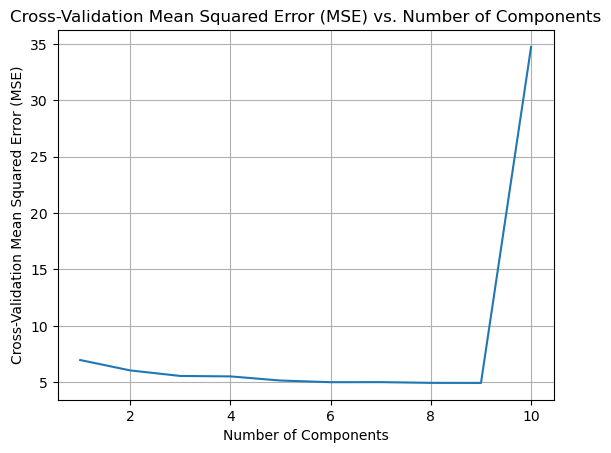

In [14]:
# PLS
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Define PLS Regression with varying number of components
pls_model_cv = PLSRegression()

# Perform k-fold cross-validation with different number of components
components_range = range(1, 11)  # Try different numbers of components
cv_mse_scores = []  # Store MSE scores

for n_components in components_range:
    pls_model_cv.n_components = n_components
    # Perform cross-validation with MSE scoring
    scores = -1 * cross_val_score(pls_model_cv, X_train_scaled, Y_train, cv=5, scoring='neg_mean_squared_error')
    cv_mse_scores.append(scores.mean())

# Plot the cross-validation MSE scores
plt.plot(components_range, cv_mse_scores)
plt.xlabel('Number of Components')
plt.ylabel('Cross-Validation Mean Squared Error (MSE)')
plt.title('Cross-Validation Mean Squared Error (MSE) vs. Number of Components')
plt.grid(True)
plt.show()


In [15]:
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate PLS Regression
pls_model = PLSRegression(n_components=6) 

# Fit PLS Regression to the cleaned training data
pls_model.fit(X_train_scaled, Y_train)


# Predict on the test set
pls_test_predictions = pls_model.predict(X_test_scaled)

# Evaluate the model on the test set
test_mse = mean_squared_error(Y_test, pls_test_predictions)
test_r2 = r2_score(Y_test, pls_test_predictions)

print("PLS Regression Test MSE:", test_mse)
print("PLS Regression Test R-squared (R2) score:", test_r2)

PLS Regression Test MSE: 4.996664781046759
PLS Regression Test R-squared (R2) score: 0.5072828969133577
